In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data=pd.read_csv('/content/data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
train_data["protocol_type"].value_counts()

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

In [8]:
train_data["service"].value_counts()

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

In [9]:
## finding categorical columns
num_cols = train_data._get_numeric_data().columns

cate_cols = list(set(train_data.columns)-set(num_cols))
cate_cols.remove('class')


cate_cols

['protocol_type', 'flag', 'service']

# EDA

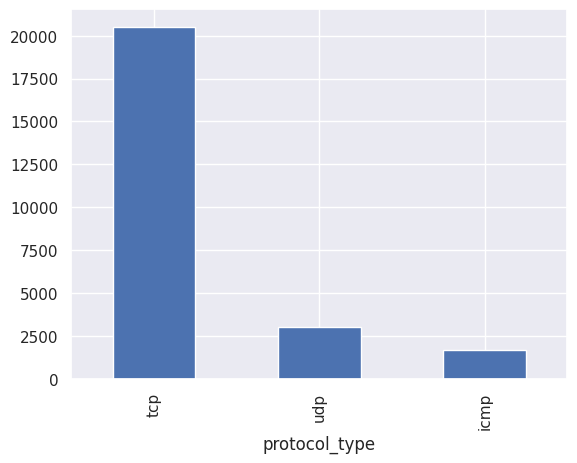

In [10]:
## Plotting different features

def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')

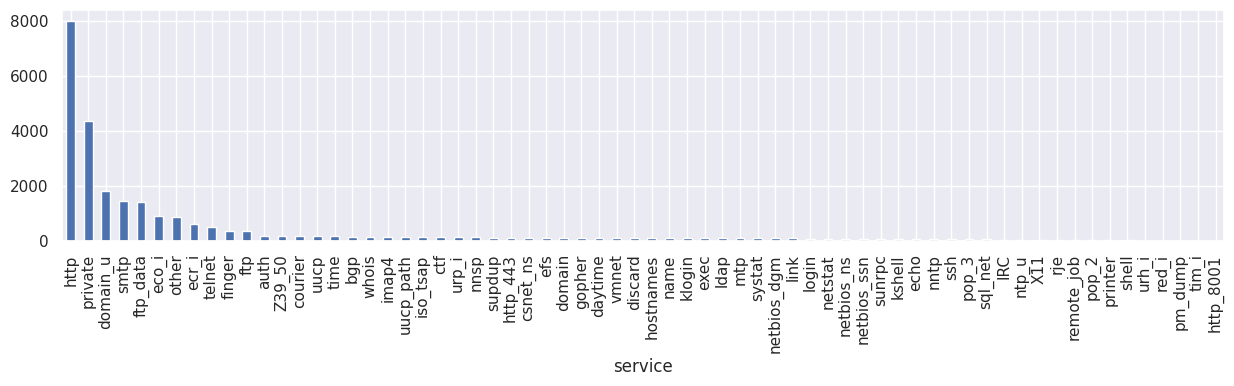

In [11]:
plt.figure(figsize=(15,3))
bar_graph('service')

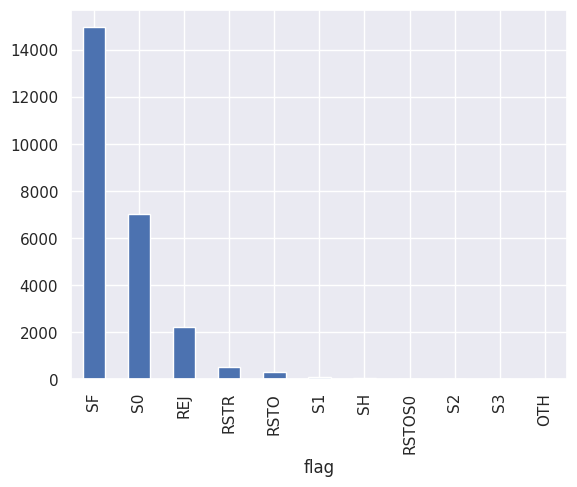

In [12]:
bar_graph('flag')

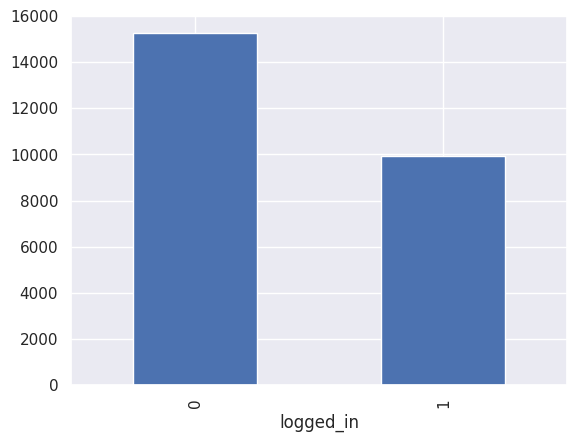

In [13]:
bar_graph('logged_in')

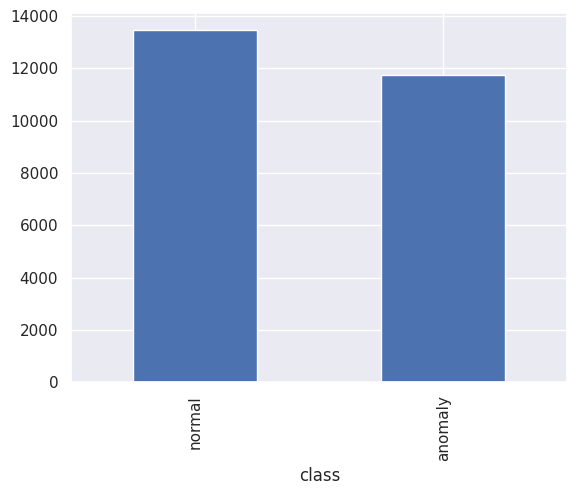

In [14]:
bar_graph('class')

# Feature Corrrelation

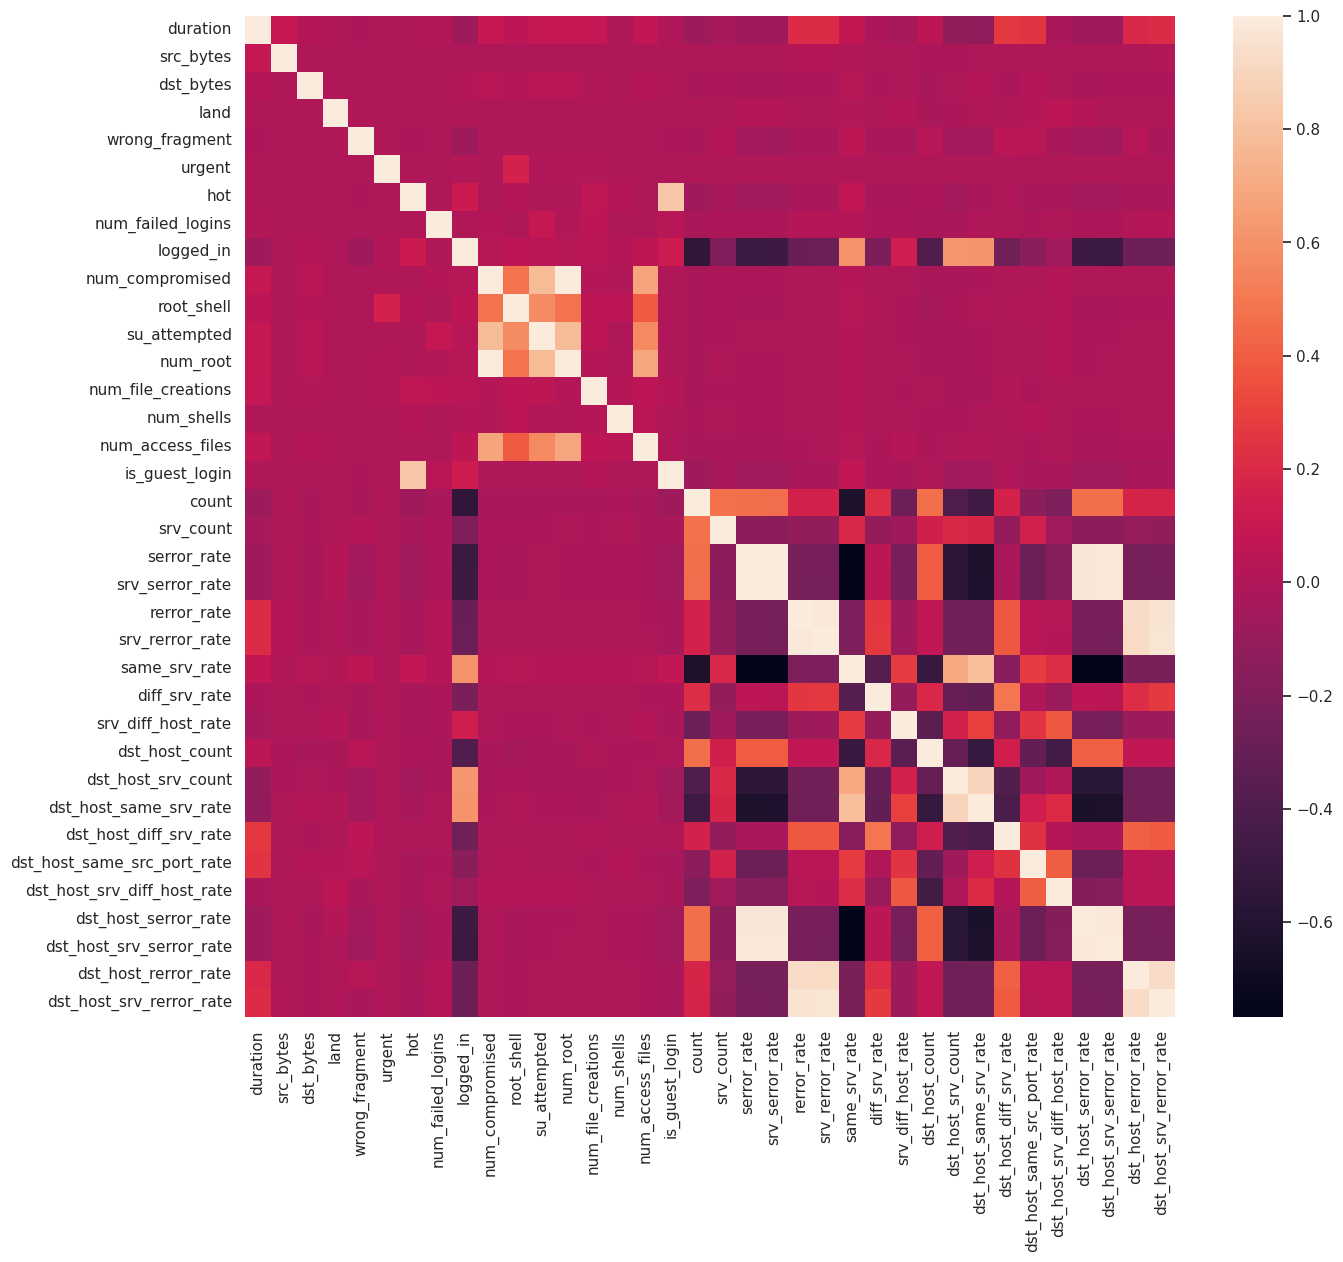

In [18]:
# Drop columns with NaN
train_data = train_data.dropna(axis=1)

# Keep only columns with more than one unique value
train_data = train_data[[col for col in train_data if train_data[col].nunique() > 1]]

# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(corr)
plt.show()


In [19]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
train_data.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
train_data.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [20]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [21]:
train_data.shape

(25192, 32)

In [22]:
train_data['protocol_type'].value_counts()

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

In [23]:
pmap = {'tcp':0,'udp':1,'icmp':2}
train_data['protocol_type'] = train_data['protocol_type'].map(pmap)

In [24]:
train_data['flag'].value_counts()

flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64

In [25]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'S1':5 ,'SH':6 ,'RSTOS0':7,'S2':8,'S3':9 ,'OTH':10}
train_data['flag'] = train_data['flag'].map(fmap)

In [26]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,0,ftp_data,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,other,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,private,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,0,http,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,http,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [27]:
train_data.drop('service',axis = 1,inplace= True)

In [28]:
train_data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,0,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [29]:
train_data.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
y = train_data[['class']]
X = train_data.drop(['class'], axis=1)

In [32]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [33]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
print(X_train.shape, X_test.shape)

(18894, 30) (6298, 30)


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

# 1. XGBoost

In [36]:
import xgboost as xgb
xgb.__version__

'2.0.3'

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [38]:
classifier = XGBClassifier()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [40]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=1,cv=5,verbose=3)

In [41]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=1.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.2s
[CV 3/5] END colsa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [44]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:13:54] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:13:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, ...)

In [46]:
y_pred = classifier.predict(X_test)
y_pred_temp = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        cl = 'anomaly'
        y_pred_temp.append(cl)
    else:
        cl= 'normal'
        y_pred_temp.append(cl)
    # print(cl)

print(y_pred)
print(y_pred_temp)
y_pred = np.array(y_pred_temp)
y_pred

[0 1 0 ... 0 1 0]
['anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'an

array(['anomaly', 'normal', 'anomaly', ..., 'anomaly', 'normal',
       'anomaly'], dtype='<U7')

In [47]:
len(y_pred)

6298

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
y_pred

array(['anomaly', 'normal', 'anomaly', ..., 'anomaly', 'normal',
       'anomaly'], dtype='<U7')

In [50]:
confusion_matrix(y_test,y_pred)

array([[2979,   11],
       [   4, 3304]])

# 2. GaussianNB         
# 3. KNeighborsClassifier                                                       
# 4. RandomForestClassifier
# 5. AdaBoostClassifier
# 6. GradientBoostingClassifier
# 7. MLPClassifier
# 8. DecisionTreeClassifier

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
models=[]
models.append(('Naive Bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Multi-Layer Perceptron',MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [53]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score
    # print(confusion_matrix(predictions,y_test))
    # print('\n')
    # print(accuracy_score(predictions,y_test))
    # print('\n')

Naive Bayes
RandomForest
AdaBoost
Gradient Boosting
Decision Tree
Multi-Layer Perceptron


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN


# Plotting and comparing the accuracy of all algorithms


<BarContainer object of 8 artists>

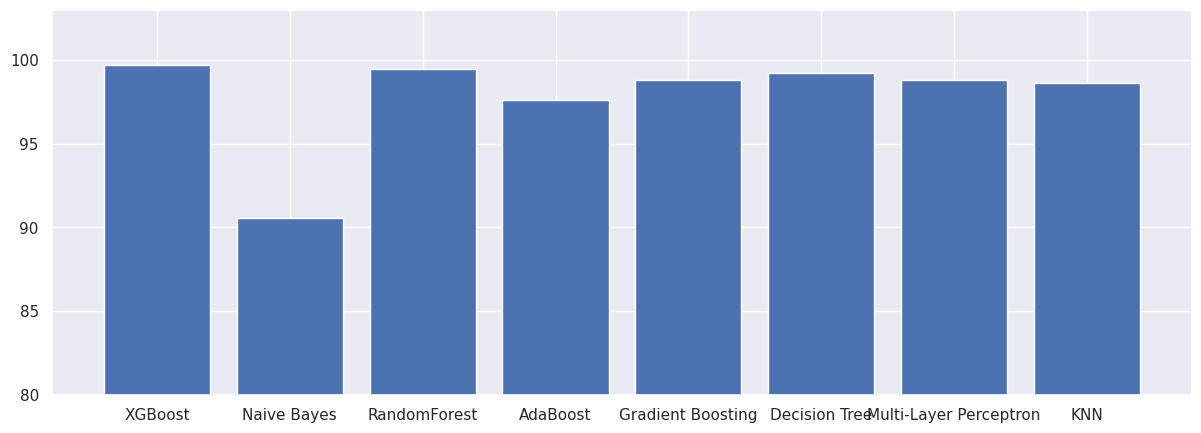

In [54]:
names= ['XGBoost',
'Naive Bayes',
'RandomForest',
'AdaBoost',
'Gradient Boosting',
'Decision Tree',
'Multi-Layer Perceptron',
'KNN']
values=[99.71419498253413,90.58431248015243,
99.4919021911718,97.58653540806606,
98.77738964750714,99.25373134328358,
98.77738964750714,98.61860908224833]
f = plt.figure(figsize=(50,5),num=10)
plt.subplot(131)
plt.ylim(80,103)
plt.bar(names,values)

In [55]:
import pickle

In [56]:
filename = 'network_security_breach_prediction_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y = train_data[['class']]
X = train_data.drop(['class'], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
print(X_train.shape, X_test.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
classifier = XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=1,cv=5,verbose=3)
random_search.fit(X_train,y_train)
random_search.best_estimator_
random_search.best_params_
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred_temp = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        cl = 'anomaly'
        y_pred_temp.append(cl)
    else:
        cl= 'normal'
        y_pred_temp.append(cl)
    # print(cl)

print(y_pred)
print(y_pred_temp)
y_pred = np.array(y_pred_temp)
y_pred
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

(18894, 30) (6298, 30)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.9s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=1.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:14:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[0 1 0 ... 0 1 0]
['anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'an

0.9976182915211178